<a href="https://colab.research.google.com/github/Natalkina/DataScience/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді

В загальному вигляді модель лінійної регресії має вигляд:

$$h(x) = w_0 + w_1x_1 + w_2x_2+ ...w_nx_n$$

У векторному вигляді гіпотеза буде виглядати так:

$$  h(x) = w^T * X $$

де:

$h(x)$ - гіпотеза (прогнозоване значення)

$w$ - вектор вагових коефіцієнтів

$w^T$ - транспонований вектор вагових коефіцієнтів

$X$ - вектор вхідних ознак (фіч), включаючи значення $x₀$ = 1 (для зручності врахування зсуву $w₀$)

In [1]:
import numpy as np

def linear_regression_hypothesis(w, X):

    return np.dot(X, w)


Cтворіть функцію для обчислення функції втрат у векторному вигляді

Функція втрат:
\begin{align*}
  \\
    &J(\mathbf{w}) = \frac{1}{2} ||\mathbf{X}\mathbf{w} - \mathbf{y}||_2 \\
\end{align*}



In [2]:
def loss(w, x, y):
    N = len(y)
    predictions = linear_regression_hypothesis(w, x)
    loss_value = (1/N) * np.sum((y - predictions)**2)
    return loss_value

Реалізуйте один крок градієнтного спуску

Кожна ітерація градієнтного спуску оновлює параметри моделі:

$$w_0 = w_0 - α * ∂L/∂w_0$$
$$w_1 = w_1 - α * ∂L/∂w_1$$

- $w_0$, $w_1$ - це параметри моделі.
- $α$ - це швидкість навчання, яка визначає крок на кожній ітерації.
- $∂L/∂w_0$, $∂L/∂w_1$ - часткові похідні функції втрат по параметрам $w_0$, $w_1$, які вказують напрямок найшвидшого зростання.


In [3]:
w = np.zeros((3, 1))
print(f"Iteration 1: parameters:\n {w}")

# Data generation
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Design matrix
X = np.concatenate([np.ones((100, 1)), x, x * np.random.rand(1)], axis=1)
# X[:10]

m = len(y)
alpha = 0.1
estimation = linear_regression_hypothesis(w, X)
print(f"Iteration 1: prediction:\n {estimation[:3]}")

# Updating weights
w = w - alpha * np.dot(X.T, (np.dot(X, w) - y)) / m
estimation = linear_regression_hypothesis(w, X)
loss = loss(w,X,y)
print(f"Iteration 1: parameters:\n {w}")
print(f"Iteration 1: prediction:\n {estimation[:3]}")
print(f"Iteration 1: loss:\n {loss}")

Iteration 1: parameters:
 [[0.]
 [0.]
 [0.]]
Iteration 1: prediction:
 [[0.]
 [0.]
 [0.]]
Iteration 1: parameters:
 [[0.41202073]
 [0.2513686 ]
 [0.03690024]]
Iteration 1: prediction:
 [[0.58599195]
 [0.50556705]
 [0.5677243 ]]
Iteration 1: loss:
 13.492175721954741


Знайдіть найкращі параметри для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [4]:
import pandas as pd


df=pd.read_csv("https://raw.githubusercontent.com/Natalkina/datasets/main/Housing.csv")
df.head(3)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [6]:
df.shape

(545, 13)

Подивимося для прикладу на залежність ціни від площі

Text(0, 0.5, 'price')

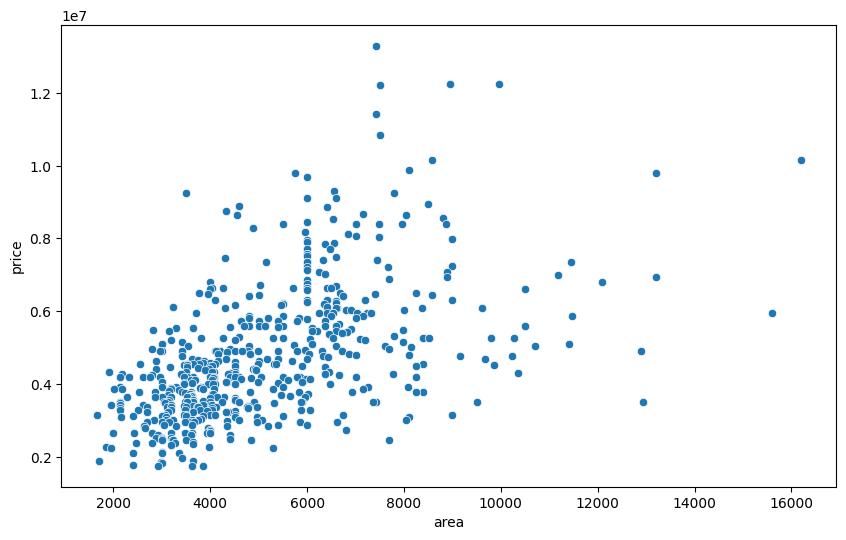

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.xlabel('area')
plt.ylabel('price')

[[0.39656357 0.6        0.33333333]
 [0.5024055  0.6        1.        ]
 [0.57113402 0.4        0.33333333]
 [0.40206186 0.6        0.33333333]
 [0.39656357 0.6        0.        ]]
[[1.        ]
 [0.90909091]
 [0.90909091]
 [0.90606061]
 [0.83636364]]
Найкращі параметри w: [[0.48 0.18 0.36]]
Зсув w_0: [0.04]
Середньоквадратична помилка: 0.0134
R2 моделі: -6.5066


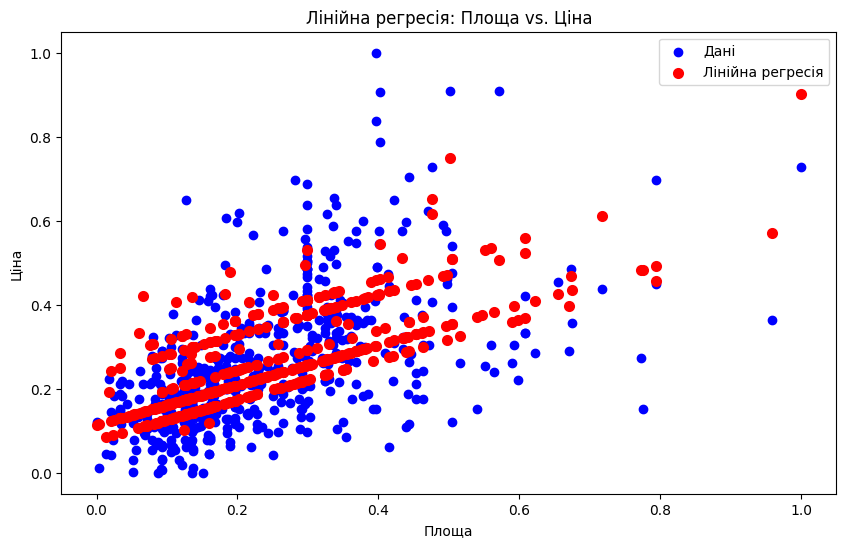

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Вибірка ознак та цільової змінної
X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values.reshape(-1,1)

# Нормалізація даних
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])
y_normalized = scaler.fit_transform(y)
print(y_normalized[:5])

# Ініціалізація та навчання моделі
model = LinearRegression()
model.fit(X_normalized, y_normalized)


# Отримання найкращих параметрів w
w = np.round(model.coef_, 2)
w_0 = np.round(model.intercept_, 2)
print("Найкращі параметри w:", w)
print("Зсув w_0:", w_0)

# Оцінка якості моделі за допомогою середньоквадратичної помилки
y_pred = model.predict(X_normalized)
mse = np.round(mean_squared_error(y_normalized, y_pred), 4)
r2 = np.round(r2_score(y, y_pred),4)
print("Середньоквадратична помилка:", mse)
print("R2 моделі:", r2)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[:, 0], y_normalized, color='blue', label='Дані')  # Assuming 'area' is the first column in X
plt.scatter(X_normalized[:, 0], y_pred, color='red', linewidth=2, label='Лінійна регресія')  # Assuming 'area' is the first column in X
plt.xlabel('Площа')
plt.ylabel('Ціна')
plt.title('Лінійна регресія: Площа vs. Ціна')
plt.legend()
plt.show()



Знайдіть ці ж параметри за допомогою аналітичного рішення;

In [7]:
# Вибірка ознак та цільової змінної
X = df[['area', 'bedrooms', 'bathrooms']].values
y = df['price'].values

# Нормалізація даних
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])
y_ = y.reshape(-1, 1)
y_normalized = scaler.fit_transform(y_)
# Add a column of ones for the bias term
X_ = np.c_[np.ones(X_normalized.shape[0]), X_normalized]
print(f"Iteration 1: parameters:\n {w}")
print(f"Форма x {X_.shape}, форма y {y_.shape}")
print(f"X {X_[:5]}")
print(f"y {y_normalized[:5]}")
# Solve using the normal equation
w = np.round(np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y_normalized), 2)

print(f"Intercept from normal equation: {w[0]}")
print(f"Coefficients from normal equation: {w[1:]}")

[[0.39656357 0.6        0.33333333]
 [0.5024055  0.6        1.        ]
 [0.57113402 0.4        0.33333333]
 [0.40206186 0.6        0.33333333]
 [0.39656357 0.6        0.        ]]
Iteration 1: parameters:
 [[0.48 0.18 0.36]]
Форма x (545, 4), форма y (545, 1)
X [[1.         0.39656357 0.6        0.33333333]
 [1.         0.5024055  0.6        1.        ]
 [1.         0.57113402 0.4        0.33333333]
 [1.         0.40206186 0.6        0.33333333]
 [1.         0.39656357 0.6        0.        ]]
y [[1.        ]
 [0.90909091]
 [0.90909091]
 [0.90606061]
 [0.83636364]]
Intercept from normal equation: [0.04]
Coefficients from normal equation: [[0.48]
 [0.18]
 [0.36]]


Як бачимо результати з використанням обох варіантів співпадають.